# About the Dataset

## Title: Haberman's Survival Data

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI. Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical) ='Age' Patient's year of operation (year - 1900, numerical) = 'Operation Year' Number of positive axillary nodes detected (numerical) = '+ve lymph nodes' Survival status (class attribute) = 'Survival_Status' 1 = the patient survived 5 years or longer 2 = the patient died within 5 year Missing Attribute Values: None


# Objective
### To find out relatioship of survival status with the other features

In [1]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels import robust

#disabling filter warning
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
haberman=pd.read_csv("../input/habermans-survival-data-set/haberman.csv")

In [3]:
#displaying the first 5 columns of the data set
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


It seems that the dataset has no columns given by default. Hence we are going to edit the data set with columns name 

In [4]:
#storing column names in List
col_names=["Age","Operation Year", "+ve lymph nodes", "Surival status"]
#passing the list as column names in dataset
haberman=pd.read_csv("../input/habermans-survival-data-set/haberman.csv", header=None, names= col_names)

In [5]:
#Displaying the dataset with column names
haberman

,Age,Operation Year,+ve lymph nodes,Surival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


#### Inspection of the dataset

In [6]:
#size of the dataset
row, column=np.shape(haberman)

In [7]:
#printing total no of rows and columns
print("Total number of rows and columns are respectively= {} and {}".format(row,column))

Total number of rows and columns are respectively= 306 and 4


In [8]:
#Checking type of variable in the data set
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation Year   306 non-null    int64
 2   +ve lymph nodes  306 non-null    int64
 3   Surival status   306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Here we can see there is no object i.e no datatype as categorical & there is no Nan valuue in any column as all the counts are 306. Still for our practice we will check once for null values in next line of code

In [9]:
#Checking for null object 
haberman.isnull().sum()

Age                0
Operation Year     0
+ve lymph nodes    0
Surival status     0
dtype: int64

Hence it is clear that no null object is present in the dataset by cross checking again. 

In [10]:
#Checking unique values/variability of every columns altogether
haberman.nunique()

Age                49
Operation Year     12
+ve lymph nodes    31
Surival status      2
dtype: int64

It is observed that variability of different values is more in Age. However our class is Survival status where unique values or dependent variables are two. Let's inspect Survival Status now

In [11]:
#inspecting Survival status
haberman["Surival status"].unique()

array([1, 2])

This function lists the unique variables which is 1 and 2 in this case. To avoid confusion let's rename 1 as True which means the person has survived and 2 as False which means the person has died 

In [12]:
#Replacing 1 as True and 2 as False 
haberman["Surival status"].replace({1:True,2:False}, inplace=True)

In [13]:
#Displaying replaced value 
haberman.head()

,Age,Operation Year,+ve lymph nodes,Surival status
0,30,64,1,True
1,30,62,3,True
2,30,65,0,True
3,31,59,2,True
4,31,65,4,True


In [14]:
#Now let us check how many persons has died and how many has survived
haberman["Surival status"].value_counts()

True     225
False     81
Name: Surival status, dtype: int64

It is clearly observed that more persons has survived than persons died

#### High level statistics

In [15]:
haberman.describe()

,Age,Operation Year,+ve lymph nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Decribe function represents statistics of all numerical data. Here we can see 75% persons are having age equal or lesser than 60 years whereas average age is 52.4 years. 75% of operations were done in the year equal or lesser than 65 where standard deviation is 3.24 years. Outliers can be spotted in +ve lymph nodes as 75% of +ve lymph nodes are equeal or lesser than 4

### Univariate Analysis
#### This analysis represent direct relationship of class or dependnent variables based on one feature 

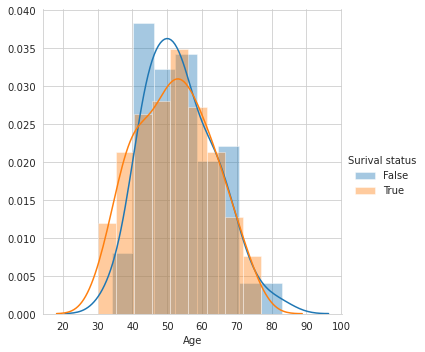

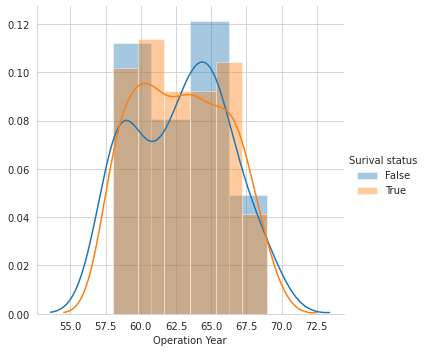

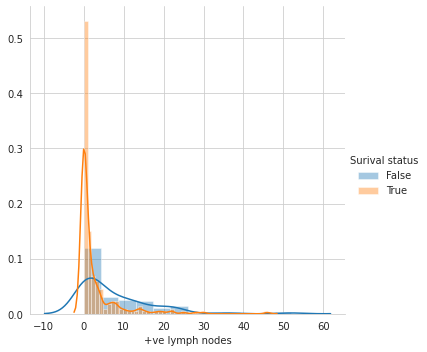

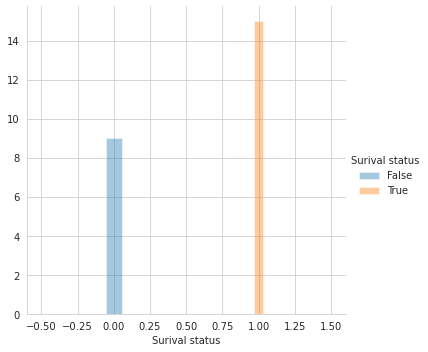

In [16]:
#inspecting distribution plot of each features individually 
sns.set_style("whitegrid")
for i in haberman:
    sns.FacetGrid (haberman,hue="Surival status", size= 5)\
    .map(sns.distplot, i)\
    .add_legend()
    

Conclusion:

    1.Age- Looking at the districution plot no perfect conclusion can be stated as almost 95% plots are overlapped. However it can be said that persons having age 40 to around 52 have lesser chances of being survived and persons having age 30-40 years have higher chance to survive 
    2.Operation Year- Major overlapping is observed here also.But from the year 1961 to 1963 death percentage is lower than survival & again from the year 1963 to 1966 Death percentage is higher than survival
    3.+ve positive lymph nodes- Major overlapping is observed here also. But it can be stated that for lesser lymph nodes around 1-3 chances of survival is pretty higher 
Hence no perfect colclusion can be given

In [17]:
#Creating two data frame of survival and death person
surv= haberman.loc[haberman["Surival status"]==True]
dead=haberman.loc[haberman["Surival status"]==False]

********Relation with Survival/Death=:  Age ********

Survival Counts are=[12 24 28 21 37 37 21 25 14  6] & Bin edges are= [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

Death Counts are=[ 3 10 16 16 11 10  8  4  2  1] & Bin edges are= [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]



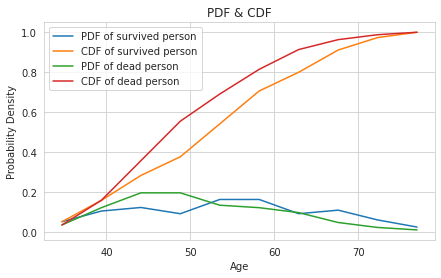

********Relation with Survival/Death=:  Operation Year ********

Survival Counts are=[42 24 23 16 22 23 15 22 21 17] & Bin edges are= [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

Death Counts are=[21  4  3  7  8  8 13  6  4  7] & Bin edges are= [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]



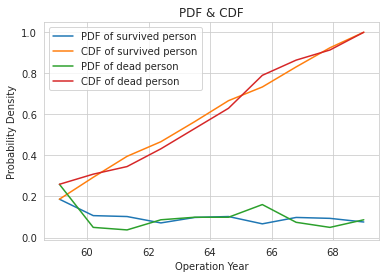

********Relation with Survival/Death=:  +ve lymph nodes ********

Survival Counts are=[188  18   5   6   4   1   2   0   0   1] & Bin edges are= [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

Death Counts are=[46 12 11  4  6  0  1  0  0  1] & Bin edges are= [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]



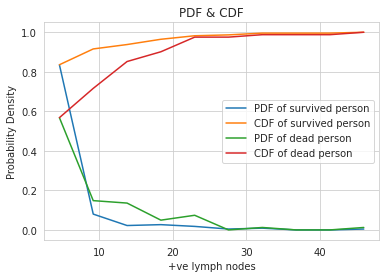

********Relation with Survival/Death=:  Surival status ********

Survival Counts are=[  0   0   0   0   0 225   0   0   0   0] & Bin edges are= [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]

Death Counts are=[ 0  0  0  0  0 81  0  0  0  0] & Bin edges are= [-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5]



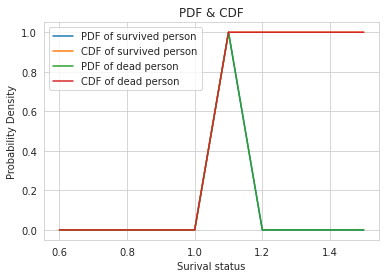

In [18]:
#plotting CDF and PDF to find variation with respect to single feature adn relation with survival and death person
sns.set_style("whitegrid")
plt.figure(figsize=(7,4))
for i in haberman:
    print("********Relation with Survival/Death=: ",i,"********")
    print()
    count, bin_edges= np.histogram(surv[i])
    count2,bin_edges2=np.histogram(dead[i])
    print("Survival Counts are={} & Bin edges are= {}\n".format(count,bin_edges))
    print("Death Counts are={} & Bin edges are= {}\n".format(count2,bin_edges2))
    pdf_surv=count/sum(count)
    cdf_surv=np.cumsum(pdf_surv)
    pdf_dead=count2/sum(count2)
    cdf_dead=np.cumsum(pdf_dead)

    plt.title("PDF & CDF")
    plt.xlabel(i)
    plt.ylabel("Probability Density")
    plt.plot(bin_edges[1:],pdf_surv,label="PDF of survived person")
    plt.plot(bin_edges[1:],cdf_surv,label="CDF of survived person")
    plt.plot(bin_edges[1:],pdf_dead,label="PDF of dead person")
    plt.plot(bin_edges[1:],cdf_dead,label="CDF of dead person")

    plt.legend(loc="best")
    plt.show()
    
          
    

Conclusion:

    1.Age-Almost 95% Age are lesser than 70 year age bracket. 
    2.Operation Year- Appx from the year 1958-1960 most operations are conducted having CDF almost 30% in just 2    years where death percentage is higher than survival
    3.+ve lymph nodes- Almost 80% patients are having lymph nodes lesser than 4. Survival is significantly higher from lymph nodes 0-8. CDF of survival is around 93% whereas for death it is around- 75%. However Rate of increase of death is higher than rate of survival from lymph nodes greater than 4

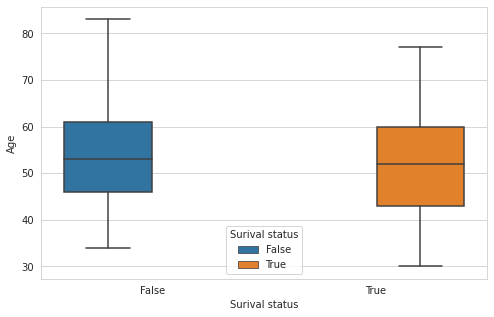

In [19]:
#Checking by means of Box plot. Comparing Survival vs death (Age)
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.boxplot(x="Surival status", y="Age",hue="Surival status", data=haberman)

Conclusion:

    1.Patients having age greater than 75 haven't survived 
    2.Patients having age lesser than 35 survived

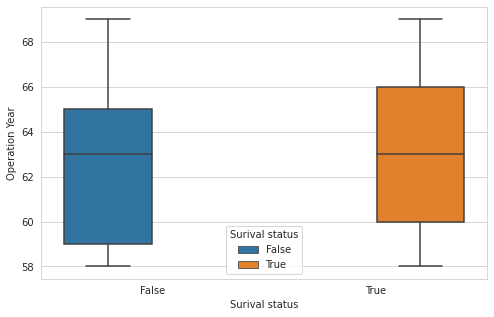

In [20]:
#Checking by means of Box plot. Comparing Survival vs death (Operation year)
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.boxplot(x="Surival status", y="Operation Year",hue="Surival status", data=haberman)

Conclusion:

    1.Can not interpret any conclusion from above graph due to major overlapping
    

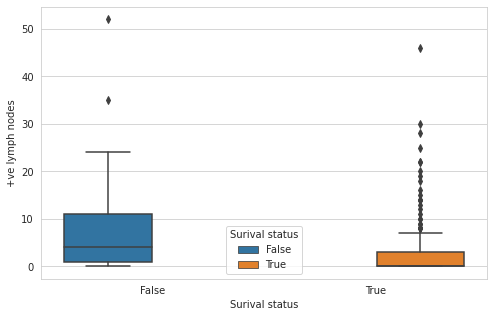

In [21]:
#Checking by means of Box plot. Comparing Survival vs death (Operation year)
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.boxplot(x="Surival status", y="+ve lymph nodes",hue="Surival status", data=haberman)

Concludion:

    1.Outliers are spotted in both data set.In case of Survival set, outliers are in large quantity.By not considering outliers it can be stated that median of positive lymph nodes for survival patients are 1 whereas for death patients it is around 4 & patiens having lymph nodes more than 7 are more likely to die 

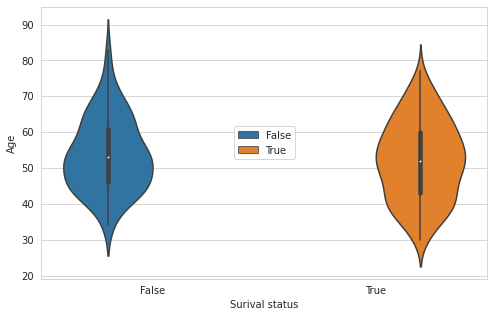

In [22]:
#Checking by means of Violin plot. Comparing Survival vs death (Age)
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.violinplot(x="Surival status", y="Age",hue="Surival status", data=haberman)
plt.legend(loc="center")

Conclusion:

    1.Very few observation are there beyond 78 years in case of survived patients. Hence It can be said that upper threshold value of age is 78 years as most patients have died beyond this age. Error percetage is very less for this assumption. 
    2. Simultaneously it can be stated that patients younger than 30 years are more likely to survive as very few patients have died before this threshold limit 

### Bivariate Analysis

#### Through this analysis we will try to interlink relationship with one feature to another. We will directly check through pair plot for better understanding  

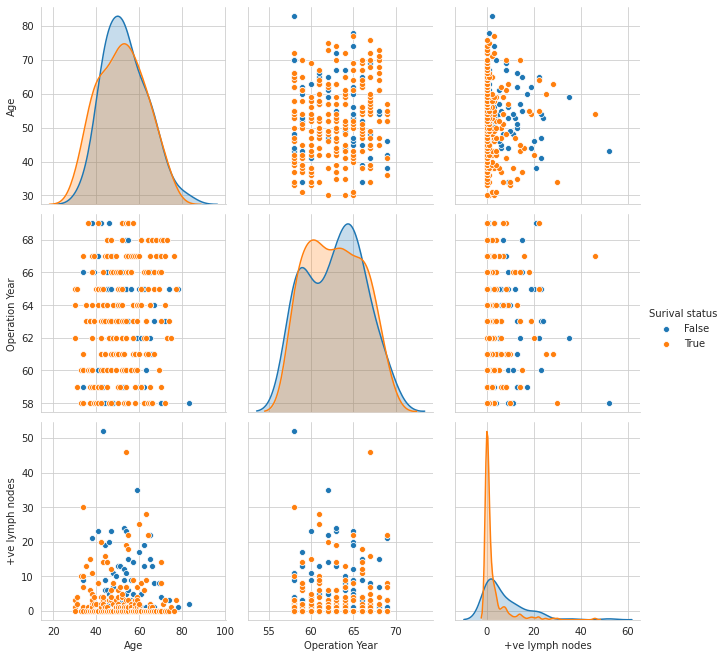

In [23]:
#Pair plot 
sns.set_style("whitegrid")
sns.pairplot(haberman, hue= "Surival status", size= 3)

Conclusion:

    1.Major overlapping. Can not consider any feature to describe perfect conclusion.
    2.For lesser positive lymph nodes, higher is the chance of survival

### Multivariate Probability Density: Contour plot
##### Here we will try to find a particular range of majority portion of the variables to finalize any range value or threshold value. It is noted only Age vs Operation Year is considered here as +ve lymph nodes will not give significant idea in this method  

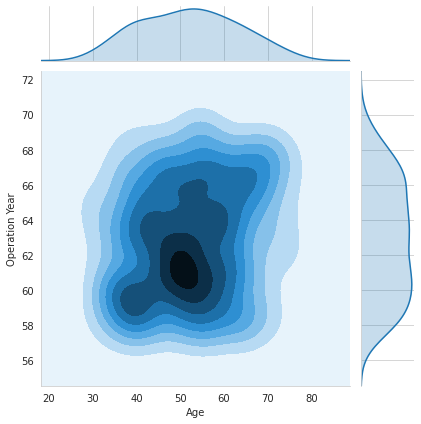

In [24]:
"""Joint plot-It is like contour map. where center is the densest state which implies most values lies in that 
particular area. Lesser the densilty, lesser are the occurance of the variables"""
#Checking from Surviving dataset seperately
sns.jointplot(x="Age", y="Operation Year", data=surv, kind="kde")

Conclusion:

    1.It is noted that Age between 45-55 & Operation year in betwwen 1959-1963 have maximum occurance of the features. As we are considering only surviving patients data here, so we can conclude that patients operated in the  year of 1959-1963 and having age in between 45-55 have more likely to survive. However after checking the dead patient's data. Final conclusion can be stated 

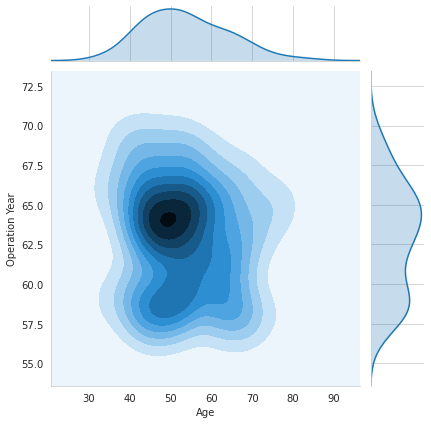

In [25]:
#Checking from dead dataset seperately
sns.jointplot(x="Age", y="Operation Year", data=dead, kind="kde")

Conclusion: 

    1.It is noted that Age between 45-55 & Operation year in betwwen 1963-1966 have maximum occurance of the features. As we are considering only dead patients data here, so we can conclude that patients operated in the  year of 1963-1966 and having age in between 45-55 have more likely to die. 

### Mean, Median, Percentile, IQR & MAD

#### Mean & Median

In [26]:
#Fining out median of each features
for i in surv:
    print("\nMedian of",i,)
    print("Value is= ",np.median(surv[i]))
    print("\nMean of",i,)
    print("Value is= ",np.mean(surv[i]))


Median of Age
Value is=  52.0

Mean of Age
Value is=  52.01777777777778

Median of Operation Year
Value is=  63.0

Mean of Operation Year
Value is=  62.86222222222222

Median of +ve lymph nodes
Value is=  0.0

Mean of +ve lymph nodes
Value is=  2.7911111111111113

Median of Surival status
Value is=  1.0

Mean of Surival status
Value is=  1.0


Conclusion: 

    1.It is observed that mean and median of Age and operation year is almost same for survived patients i.e no skew is observed 

In [27]:
for i in surv:
    print("\nMedian of",i,)
    print("Value is= ",np.median(dead[i]))
    print("\nMean of",i)
    print("Value is= ",np.mean(dead[i]))


Median of Age
Value is=  53.0

Mean of Age
Value is=  53.67901234567901

Median of Operation Year
Value is=  63.0

Mean of Operation Year
Value is=  62.82716049382716

Median of +ve lymph nodes
Value is=  4.0

Mean of +ve lymph nodes
Value is=  7.45679012345679

Median of Surival status
Value is=  0.0

Mean of Surival status
Value is=  0.0


Conclusion:

    1.Mean of +ve lymph nodes of survived patients is approximately-3 whereas for dead person it is significantly higher i.e aprroximately 7
   

#### Standard Deviation and MAD 

Generally, according to mathematicians, when a data set is of normal distribution — that is, there aren't many outliers — standard deviation is the preferable gauge of variability. But when there are large outliers, standard deviation will register higher levels of dispersion, or deviation from the center, than mean absolute deviation.

In [28]:
for i in surv:
    print("\nStandard Deviation of",i,)
    print("Value is= ",np.std(surv[i]))
    print("\nMean Absolute Deviation of",i)
    print("Value is= ",robust.mad(surv[i]))    


Standard Deviation of Age
Value is=  10.98765547510051

Mean Absolute Deviation of Age
Value is=  13.343419966550417

Standard Deviation of Operation Year
Value is=  3.2157452144021956

Mean Absolute Deviation of Operation Year
Value is=  4.447806655516806

Standard Deviation of +ve lymph nodes
Value is=  5.857258449412131

Mean Absolute Deviation of +ve lymph nodes
Value is=  0.0

Standard Deviation of Surival status
Value is=  0.0

Mean Absolute Deviation of Surival status
Value is=  0.0


Conclusion: 

    1.Going by definition and rechcking the box plot data it can be stated that for positive lymph nodes M.A.D is better parameter to judge dispersion due to presence of lot of outliers. for other features STD is giving better idea about variation or dispersion of features. Max dispersion is observed for "Age".

#### Percentile 


In [29]:
#Checking 0th,25th,50th,75th quartile value and IQR for each features 
for i in surv:
    print("\nQuantiles of:",i)
    print(np.percentile(surv[i],np.arange(0, 100, 25)))
    print("90th percentile of:",i)
    print(np.percentile(surv[i],90))
    



Quantiles of: Age
[30. 43. 52. 60.]
90th percentile of: Age
67.0

Quantiles of: Operation Year
[58. 60. 63. 66.]
90th percentile of: Operation Year
67.0

Quantiles of: +ve lymph nodes
[0. 0. 0. 3.]
90th percentile of: +ve lymph nodes
8.0

Quantiles of: Surival status
[1. 1. 1. 1.]
90th percentile of: Surival status
1.0


In [30]:
# Checking 0th,25th,50th,75th quartile value for each features 
for i in dead:
    print("\nQuantiles of:",i)
    print(np.percentile(dead[i],np.arange(0, 100, 25)))
    print("90th percentile of:",i)
    print(np.percentile(dead[i],90))
    
    



Quantiles of: Age
[34. 46. 53. 61.]
90th percentile of: Age
67.0

Quantiles of: Operation Year
[58. 59. 63. 65.]
90th percentile of: Operation Year
67.0

Quantiles of: +ve lymph nodes
[ 0.  1.  4. 11.]
90th percentile of: +ve lymph nodes
20.0

Quantiles of: Surival status
[0. 0. 0. 0.]
90th percentile of: Surival status
0.0


Conclusion:

    1.0th quartile for dead dataset is 34 whereas for surv data set it is 30. Hence it can be said that patients having age in between 30-33 have survived
    2.In this method Operation year can not be good feature to judge due to similarities
    3.90% Patients having +ve lymph nodes less equal to 3 have survived. More positive lymph nodes lesser the chance of survival 

# Summarisation:
##### 1. This dataset contains one class significantly more than the other. 
##### 2. By Univariate analysis it can be stated that from districution plot patients having age in between 30-40 have higher chance of being survived.Moreover patients having age in between 40-52 have more chance of being dead. Most of the operation from 1961-1963 was succesful whereas operation from 1964-1966 are mostly failed. 
##### 3. Patients having lymph nodes lesser than 4 have more chance of being survived 
##### 4. By going through box plot and violine plot and percentiles, an approximate threshold value of "Age" parameter can be obtained. Patients having age lesser than 33 have survived and patients having age more than 78 haven't.
##### 5. Out of 3 features the most important one is "+ve lymph nodes" and then "Age". 

### However due to major overlapped data & as one class is significantly more than the other one, perfect conclusion can not be obtained through this. Basic idea about the dataset is derived 